In [126]:
import os
import networkx as nx
from pathlib import Path
from soft.entities import Item

# pages
MAINMENU = Item('ROOT', 0, back=False)
HOTSPOT = Item('HOTSPOT', 1, back=True)
PATCHES = Item('PATCHES', 1, back=True)

# HOTSPOT items
ACTIVATE = Item('ACTIVATE', 2, back=True)
DEACTIVATE = Item('DEACTIVATE', 2, back=True)

# patch path
PATCHESPATH = Path('../../patches').resolve()

# build graph

Graph = nx.DiGraph()
files = list(PATCHESPATH.glob('*.pd'))

for file in sorted(files):
    patch = Item(file.stem, 2, path=file, back=False)
    Graph.add_edge(PATCHES, patch)
    
Graph.add_edge(PATCHES, Item('back'))

#Graph.add_edges_from([(MAINMENU, HOTSPOT), (MAINMENU, PATCHES)])
#Graph.add_edges_from([(HOTSPOT, ACTIVATE), (HOTSPOT, DEACTIVATE), (HOTSPOT, Item('back'))])

def one_to_many(_from, _to):
    links = [(_from, x) for x in _to]
    Graph.add_edges_from(links)
    
one_to_many(MAINMENU, [HOTSPOT, PATCHES])
one_to_many(HOTSPOT, [ACTIVATE, DEACTIVATE, Item('back')])

In [127]:
for edge in Graph.edges:
    print([x.name for x in edge])

['PATCHES', 'p1']
['PATCHES', 'p2']
['PATCHES', 'p3']
['PATCHES', 'p4']
['PATCHES', 'p5']
['PATCHES', 'p6']
['PATCHES', 'p7']
['PATCHES', 'p8']
['PATCHES', 'p9']
['PATCHES', 'back']
['ROOT', 'HOTSPOT']
['ROOT', 'PATCHES']
['HOTSPOT', 'ACTIVATE']
['HOTSPOT', 'DEACTIVATE']
['HOTSPOT', 'back']


In [124]:
for node in Graph.nodes:
    print(node.name)

PATCHES
p1
p2
p3
p4
p5
p6
p7
p8
p9
back
ROOT
HOTSPOT


In [103]:
Graph.number_of_nodes()

17

In [104]:
import matplotlib.pyplot as plt

In [105]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3
}

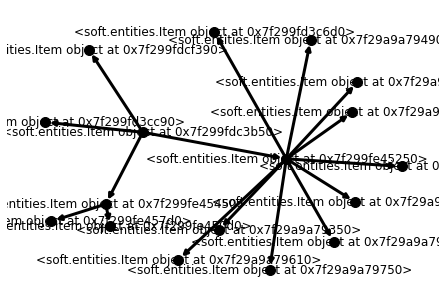

In [106]:
#subax1 = plt.subplot(222)
nx.draw(Graph, with_labels=True, **options)#, font_weight='bold')

In [97]:
help(nx.draw)

Help on function draw in module networkx.drawing.nx_pylab:

draw(G, pos=None, ax=None, **kwds)
    Draw the graph G with Matplotlib.
    
    Draw the graph as a simple representation with no node
    labels or edge labels and using the full Matplotlib figure area
    and no axis labels by default.  See draw_networkx() for more
    full-featured drawing that allows title, axis labels etc.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    
    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See :py:mod:`networkx.drawing.layout` for functions that
       compute node positions.
    
    ax : Matplotlib Axes object, optional
       Draw the graph in specified Matplotlib axes.
    
    kwds : optional keywords
       See networkx.draw_networkx() for a description of optional keywords.
    
    Examples
    --------
    >>> G = nx.dodecahedral_gr

In [98]:
help(plt.draw)

Help on function draw in module matplotlib.pyplot:

draw()
    Redraw the current figure.
    
    This is used to update a figure that has been altered, but not
    automatically re-drawn.  If interactive mode is on (via `.ion()`), this
    should be only rarely needed, but there may be ways to modify the state of
    a figure without marking it as "stale".  Please report these cases as bugs.
    
    This is equivalent to calling ``fig.canvas.draw_idle()``, where ``fig`` is
    the current figure.

